# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress
# citypy allows us to determine cities based on latitude and longitude
from citipy import citipy

# Import wether api zccess key
from api_keys import weather_api_key


# Define range of latitudes and longitudes
lat_rng = (-90,90)
lng_rng  = (-180, 180)


## Generate Cities List

In [2]:
# Create empty lists to store coordinates and city names
coordinates = []
cities = []

# Create variable to store random set of latitude and longitude values
lat = np.random.uniform(lat_rng[0], lat_rng[1], size = 1500) 
lng = np.random.uniform(lng_rng[0], lng_rng[1], size = 1500)
# Store both sets together
coordinates = zip(lat,lng)

# We create a loop that uses citipy to identify the nearest city to each set of coordinates
for lat_lng in coordinates:
    # Store the city name in a variable using citipy
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Append the city name to our cities liest
    if city not in cities:
        cities.append(city)
# Print the count of cities 
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Createa variable for the API URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create a list to store the data of each city
city_data = []

# Create counters
record_count = 1


for city in cities:
    # Create url for each city in our list
    query_url =f"{url}&q={city}"

    # Try and except function help us treat missing data
    try: 
        #Request data and parse it in json
        response = requests.get(query_url).json()
        
        # parse the data into each category
        country = response["sys"]["country"]
        city_name = response["name"]
        date = response["dt"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        humidity = response["main"]["humidity"]
        max_temp = response["main"]["temp_max"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        # Update the record count 
        record_count +=1
        
            # Append data to our data list
        city_data.append({"City": city_name, 
                        "Lat": latitude, 
                        "Lng": longitude, 
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date})
            # Print the city name and correspendent reccord
        print(f"Processing Record{record_count} | city: {city}")
        
    except Exception:
        print('City not found! skipping...')

print(" --- Data Collection Completed --- ")

sing Record63 | city: butaritari
Processing Record64 | city: kodiak
Processing Record65 | city: itoman
Processing Record66 | city: saint-philippe
Processing Record67 | city: lesnoye
Processing Record68 | city: lompoc
Processing Record69 | city: petropavlovsk-kamchatskiy
Processing Record70 | city: dikson
Processing Record71 | city: usinsk
Processing Record72 | city: zapolyarnyy
Processing Record73 | city: yellowknife
Processing Record74 | city: soria
Processing Record75 | city: tiarei
Processing Record76 | city: busselton
Processing Record77 | city: arraial do cabo
Processing Record78 | city: broome
Processing Record79 | city: abu samrah
Processing Record80 | city: longyearbyen
Processing Record81 | city: mahina
Processing Record82 | city: puerto del rosario
Processing Record83 | city: mangrol
City not found! skipping...
Processing Record84 | city: paamiut
City not found! skipping...
City not found! skipping...
Processing Record85 | city: ilam
Processing Record86 | city: jiquipilas
Pro

In [4]:
#Transform our city_data list into a pandas data frame
city_df = pd.DataFrame(city_data)
# List the number of entries in each column
city_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save the data frame into csv
city_df.to_csv('../output_data/cities.csv')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,70.32,73,71,17.38,AR,1614690579
1,Port Moresby,-9.4431,147.1797,75.20,94,40,5.75,PG,1614690409
2,Bassar,9.2500,0.7833,96.80,16,0,11.50,TG,1614690579
3,Chuzhou,32.3219,118.2978,46.00,49,26,1.99,CN,1614690579
4,Makkah al Mukarramah,21.4267,39.8261,84.38,29,9,8.90,SA,1614690460


In [7]:
# Show a statistical summary of our data
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.289282,14.990749,53.143884,68.923775,49.254083,8.858857,1.614691e+09
std,33.017157,90.341310,31.935512,21.847188,40.710785,6.106042,8.781718e+01
min,-54.800000,-175.200000,-41.100000,6.000000,0.000000,0.270000,1.614690e+09
25%,-7.897350,-66.977300,33.095000,59.000000,1.000000,4.350000,1.614691e+09
50%,24.700000,20.040300,62.010000,74.000000,52.000000,7.560000,1.614691e+09
75%,48.405900,88.016700,78.965000,84.500000,90.000000,11.540000,1.614691e+09
max,78.218600,179.316700,103.960000,100.000000,100.000000,40.290000,1.614691e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
hum_data = city_df[(city_df['Humidity'] > 100 )].index
hum_data

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
low_humidity = city_df.drop(hum_data, inplace = False)
low_humidity.to_csv('../output_data/city_data_clean.csv', index_label = 'CITY_ID') 
low_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,70.32,73,71,17.38,AR,1614690579
1,Port Moresby,-9.4431,147.1797,75.20,94,40,5.75,PG,1614690409
2,Bassar,9.2500,0.7833,96.80,16,0,11.50,TG,1614690579
3,Chuzhou,32.3219,118.2978,46.00,49,26,1.99,CN,1614690579
4,Makkah al Mukarramah,21.4267,39.8261,84.38,29,9,8.90,SA,1614690460
...,...,...,...,...,...,...,...,...,...
546,Beyneu,45.3167,55.2000,38.97,75,100,10.11,KZ,1614690669
547,Mount Gambier,-37.8333,140.7667,53.60,62,90,6.91,AU,1614690424
548,Yaan,7.3833,8.5667,103.35,8,92,10.76,NG,1614690670
549,Grindavik,63.8424,-22.4338,44.60,100,90,11.50,IS,1614690670


In [10]:
# Assign a variable to each of the columns required for plotting
lat = low_humidity["Lat"]
max_temp = low_humidity["Max Temp"]
humidity = low_humidity["Humidity"]
cloudiness = low_humidity["Cloudiness"]
wind_speed = low_humidity["Wind Speed"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

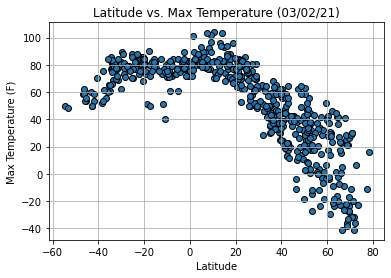

In [11]:
# Create the scatter plot with the desired variables 
plt.scatter(lat, max_temp, edgecolor = "black", marker= "o", label = "Cities")


# Assign tittle and labels
plt.title("Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving our plot 
plt.savefig("../output_data/plot1.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

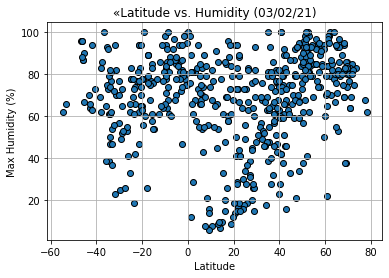

In [12]:
# Create the scatter plot with the desired variables 
plt.scatter(lat, humidity, edgecolor = "black", marker= "o", label = "Cities")


# Assign tittle and labels
plt.title("«Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Max Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving our plot 
plt.savefig("../output_data/plot2.png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

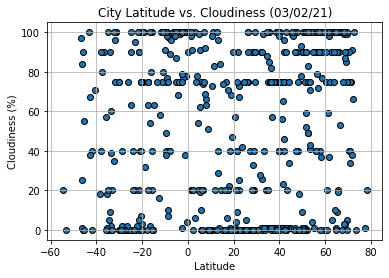

In [13]:
# Create the scatter plot with the desired variables 
plt.scatter(lat, cloudiness, edgecolor = "black", marker= "o", label = "Cities")


# Assign tittle and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving our plot 
plt.savefig("../output_data/plot3.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot

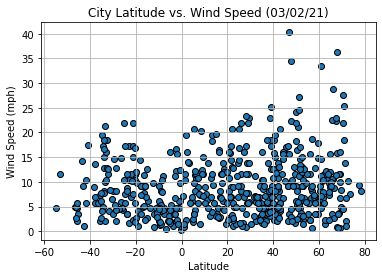

In [14]:
# Create the scatter plot with the desired variables 
plt.scatter(lat, wind_speed, edgecolor = "black", marker= "o", label = "Cities")


# Assign tittle and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving our plot 
plt.savefig("../output_data/plot4.png")

# Show plot
plt.show()


## Linear Regression

In [15]:

# Define our linear regression with y and x vaues to place our data sets, changing title of the graph, and a label with the linear regression equation
def linear_regression(x_values, y_values, y_label, label):
    
    # Call the linear regression function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    # Print the linear equation
    plt.annotate(line_eq,label,fontsize=15,color="red")
    plt.xlabel('Latitude')
    # Define the y label per corresponding data set
    plt.ylabel(f'{y_label}')
    plt.grid()

In [16]:
north_hem = city_df.loc[(city_df['Lat'] >= 0 )]
south_hem = city_df.loc[(city_df['Lat'] < 0 )]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8592381929953784
y = -1.46x + 99.95


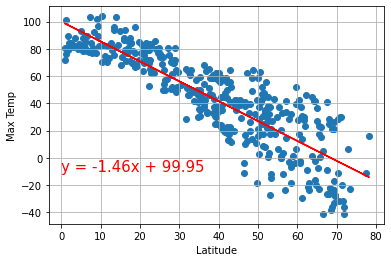

In [17]:
y_values = north_hem['Max Temp']
x_values = north_hem['Lat']
linear_regression(x_values, y_values, 'Max Temp',(0,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.45696054173514655
y = 0.35x + 82.13


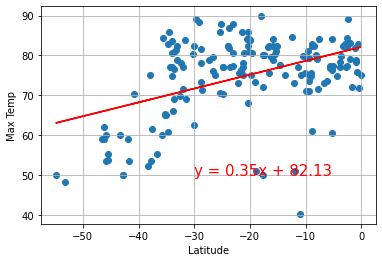

In [18]:
y_values = south_hem['Max Temp']
x_values = south_hem['Lat']
linear_regression(x_values, y_values, 'Max Temp',(-30,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.39263066026270493
y = 0.47x + 49.25


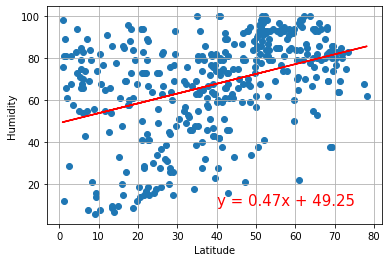

In [19]:
y_values = north_hem['Humidity']
x_values = north_hem['Lat']
linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.22876516695707103
y = 0.29x + 78.87


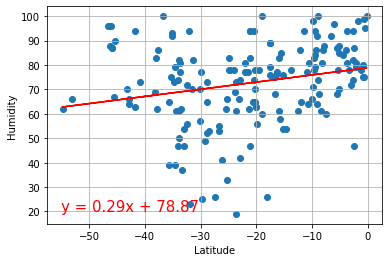

In [20]:
y_values = south_hem['Humidity']
x_values = south_hem['Lat']
linear_regression(x_values, y_values, 'Humidity',(-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.24115378437608312
y = 0.5x + 28.53


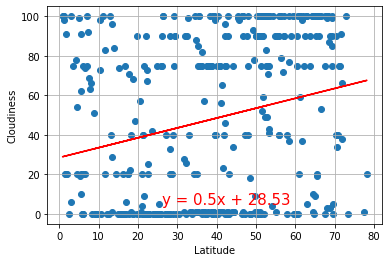

In [21]:
y_values = north_hem['Cloudiness']
x_values = north_hem['Lat']
linear_regression(x_values, y_values, 'Cloudiness',(26,5))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.39057987416259515
y = 1.18x + 77.48


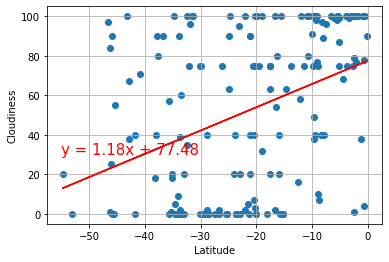

In [22]:
y_values = south_hem['Cloudiness']
x_values = south_hem['Lat']
linear_regression(x_values, y_values, 'Cloudiness',(-55,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.09672203045968114
y = 0.03x + 8.16


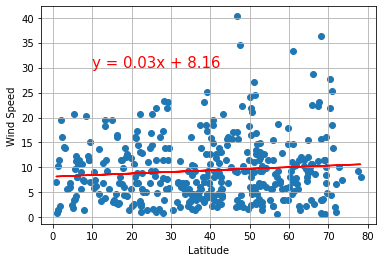

In [23]:
y_values = north_hem['Wind Speed']
x_values = north_hem['Lat']
linear_regression(x_values, y_values, 'Wind Speed',(10,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.21535433839078602
y = -0.08x + 5.94


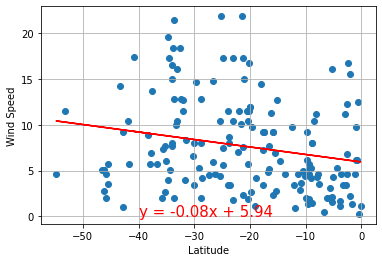

In [29]:
y_values = south_hem['Wind Speed']
x_values = south_hem['Lat']
linear_regression(x_values, y_values, 'Wind Speed',(-40,0))